In [36]:
import numpy as np

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from LeukemiaNet import LeukemiaNet_Features_Resnet

In [37]:
feature_extractor = LeukemiaNet_Features_Resnet()
feature_extractor.load_state_dict(torch.load("FeatureExtractor_tuned.pt"))
feature_extractor.eval()

images = datasets.ImageFolder('./Processed_Data/', transform=transforms.ToTensor())
test_loader = DataLoader(images, batch_size=1, shuffle=True)

In [38]:
with torch.no_grad():
    embeddings = []
    labels = []
    for data, target in test_loader:
        output = feature_extractor(data)
        embeddings.append(output.squeeze().numpy())
        labels.append(target.squeeze().numpy())
embeddings = np.array(embeddings)
labels = np.array(labels)

c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

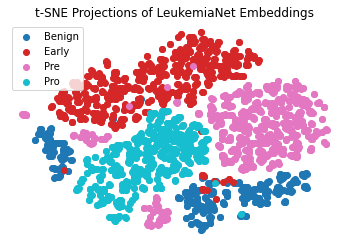

In [43]:
#Apply t-SNE to the embeddings to get a 2D projection
tsne = TSNE(n_components=2, perplexity=2, learning_rate=200, n_iter=5000)
projection = tsne.fit_transform(embeddings)

# Define the classes and their corresponding colors
class_labels = {0: 'Benign', 1: 'Early', 2: 'Pre', 3: 'Pro'}
classes = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))

# Plot the embeddings colored by their labels
fig, ax = plt.subplots()
for i, label in enumerate(classes):
    idx = labels == label
    ax.scatter(projection[idx, 0], projection[idx, 1], c=colors[i], label=class_labels[label])
ax.legend()
plt.title('t-SNE Projections of LeukemiaNet Embeddings')
plt.axis('off')
plt.show()